# Model for Tumor classification

Explain project goals

## Import libraries

In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)


In [2]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
num_classes = 2
model = create_cnn_model(input_shape, num_classes)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Save the model
model.save('brain_tumor_cnn_model.h5')


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 97s 689ms/step - accuracy: 0.7103 - loss: 0.8200 - val_accuracy: 0.8968 - val_loss: 0.2843
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 650ms/step - accuracy: 0.9052 - loss: 0.2432 - val_accuracy: 0.9357 - val_loss: 0.1795
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 652ms/step - accuracy: 0.9550 - loss: 0.1281 - val_accuracy: 0.9376 - val_loss: 0.1803
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 637ms/step - accuracy: 0.9727 - loss: 0.0805 - val_accuracy: 0.9620 - val_loss: 0.1472
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 642ms/step - accuracy: 0.9840 - loss: 0.0457 - val_accuracy: 0.9729 - val_loss: 0.1388
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 637ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9674 - val_loss: 0.1230
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 652ms/step - accuracy: 0.9949 - loss: 0.0180 - val_accuracy: 0.9719 - val_loss: 0.1380
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 649ms/step - accuracy: 0.9964 - loss: 0

### Count class

In [4]:
def count_images_in_categories(image_dir, labels):
    image_counts = {label: 0 for label in labels}
    
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        image_counts[label] = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
    
    return image_counts

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
image_counts = count_images_in_categories(image_dir, labels)

# Print the counts of images in each category
print(f"Number of 'tumor' images: {image_counts['tumor']}")
print(f"Number of 'no_tumor' images: {image_counts['no_tumor']}")


Number of 'tumor' images: 3872
Number of 'no_tumor' images: 1650


### Using class_weight

In [11]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = np.array(processed_labels)
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 classes: tumor and no_tumor
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Train the model with class weights
model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=5, class_weight=class_weights_dict)


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 85s 602ms/step - accuracy: 0.7055 - loss: 1.0563 - val_accuracy: 0.9303 - val_loss: 0.1936
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 80s 574ms/step - accuracy: 0.9616 - loss: 0.1249 - val_accuracy: 0.9321 - val_loss: 0.2088
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 76s 543ms/step - accuracy: 0.9729 - loss: 0.0832 - val_accuracy: 0.9593 - val_loss: 0.1553
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 563ms/step - accuracy: 0.9912 - loss: 0.0304 - val_accuracy: 0.9457 - val_loss: 0.2153
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 560ms/step - accuracy: 0.9656 - loss: 0.0882 - val_accuracy: 0.9584 - val_loss: 0.1878


### Print class weight after modeling

In [13]:
print(class_weights_dict)

{0: 0.7135702746365105, 1: 1.670574886535552}


## Add classweight

In [14]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = np.array(processed_labels)
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming 2 classes: tumor and no_tumor
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Train the model with class weights
model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=2, class_weight=class_weights_dict)

# Model evaluation
# Predict the labels for the validation set
y_val_pred = model.predict(X_val)

# Convert predictions and true labels to integer format
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_categorical, axis=1)

# Generate classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=['tumor', 'no_tumor'])
print(report)


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 638ms/step - accuracy: 0.6585 - loss: 1.0638 - val_accuracy: 0.9186 - val_loss: 0.2499
Epoch 2/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 72s 518ms/step - accuracy: 0.9187 - loss: 0.2141 - val_accuracy: 0.9548 - val_loss: 0.1585
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step
              precision    recall  f1-score   support

       tumor       0.95      0.98      0.97       777
    no_tumor       0.96      0.89      0.92       328

    accuracy                           0.95      1105
   macro avg       0.96      0.94      0.94      1105
weighted avg       0.95      0.95      0.95      1105



### Confusion Matrix

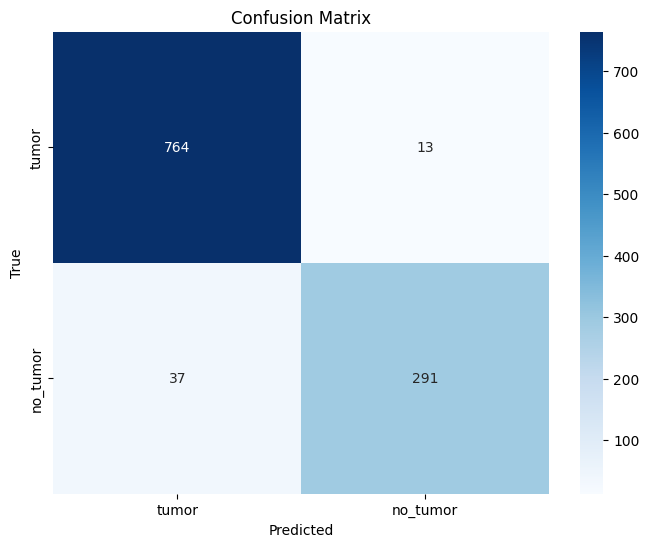

In [19]:
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['tumor', 'no_tumor'], yticklabels=['tumor', 'no_tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1, 'aug_no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)


def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
num_classes = 2
model = create_cnn_model(input_shape, num_classes)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=32)

# Save the model
model.save('brain_tumor_cnn_model.h5')


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
 10/189 ━━━━━━━━━━━━━━━━━━━━ 2:33 856ms/step - accuracy: 0.5318 - loss: 0.8183